# Q-Learning Algoritham

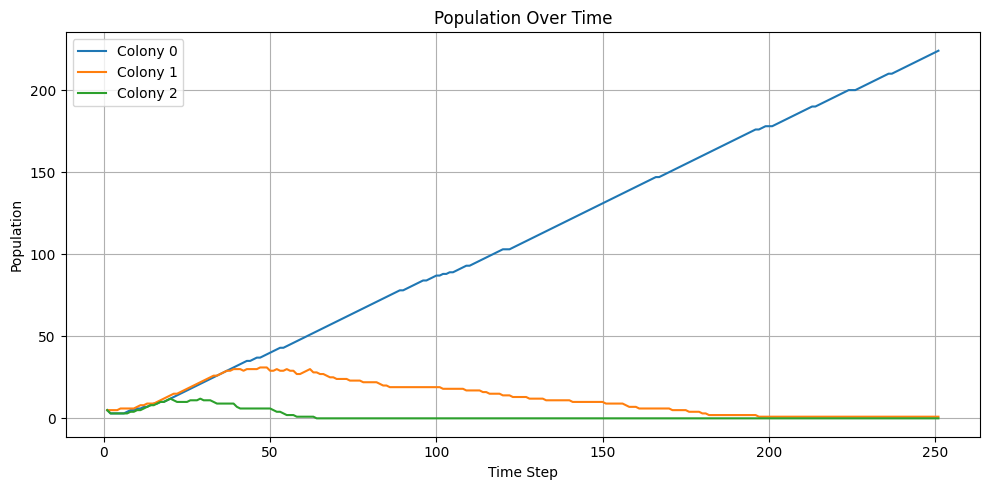

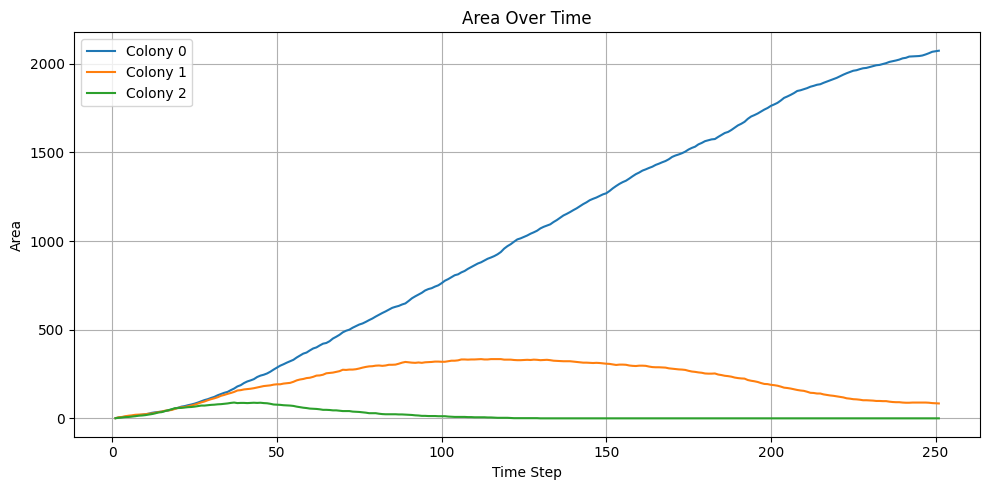

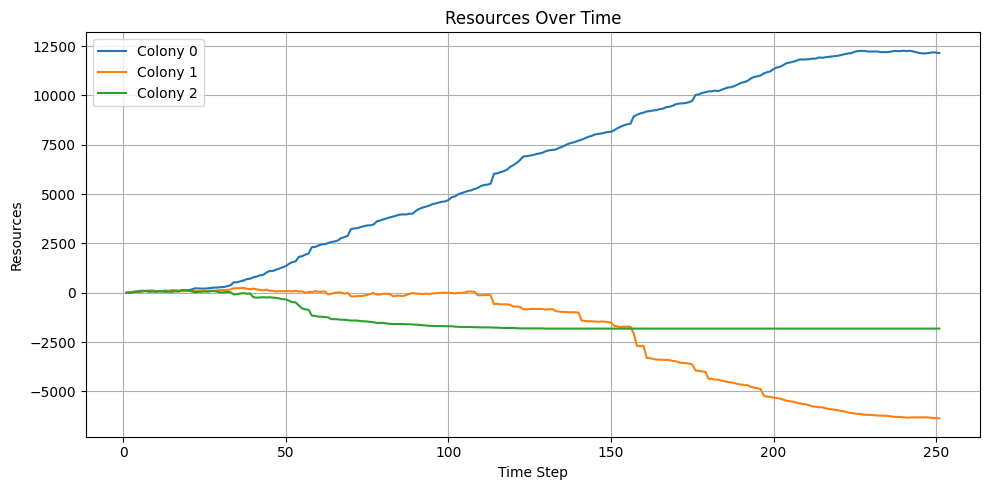

In [3]:
import csv
import matplotlib.pyplot as plt
from collections import defaultdict

# Store metrics: metric -> colony_id -> list of values
metrics = ['population', 'area', 'resources']
data = {metric: defaultdict(list) for metric in metrics}
time_per_colony = defaultdict(list)

# Read the CSV
with open('all_colonies_history_q.csv', 'r') as file:
    reader = csv.DictReader(file)
    time_counter = defaultdict(int)
    for row in reader:
        colony_id = int(row['colony_id'])

        for metric in metrics:
            value = int(row[metric])
            data[metric][colony_id].append(value)

        # Track time steps separately for each colony
        time_per_colony[colony_id].append(int(row['step']))

# Plot each metric
for metric in metrics:
    plt.figure(figsize=(10, 5))
    for colony_id in data[metric]:
        plt.plot(time_per_colony[colony_id], data[metric][colony_id], label=f'Colony {colony_id}')
    plt.title(f'{metric.capitalize()} Over Time')
    plt.xlabel('Time Step')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


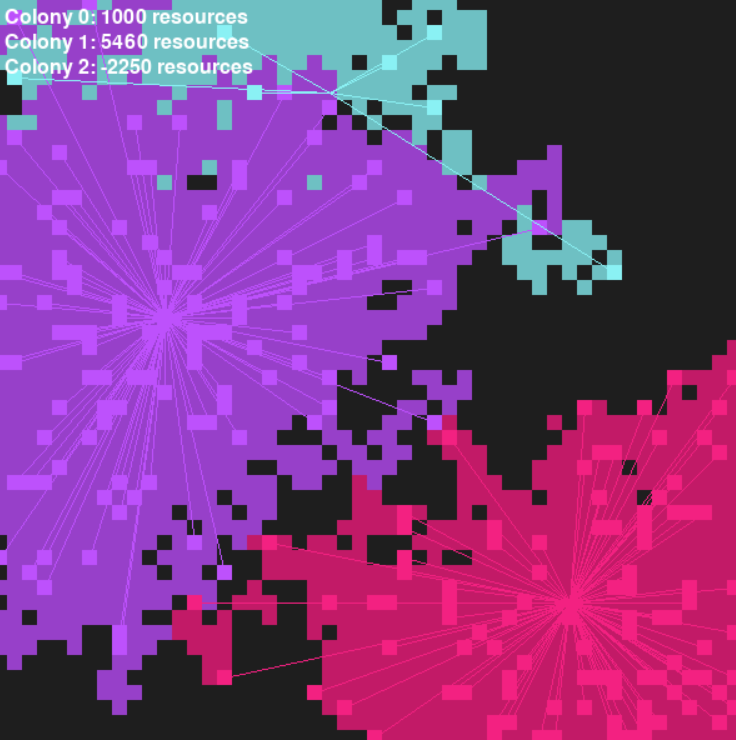

# PSO Algorithm

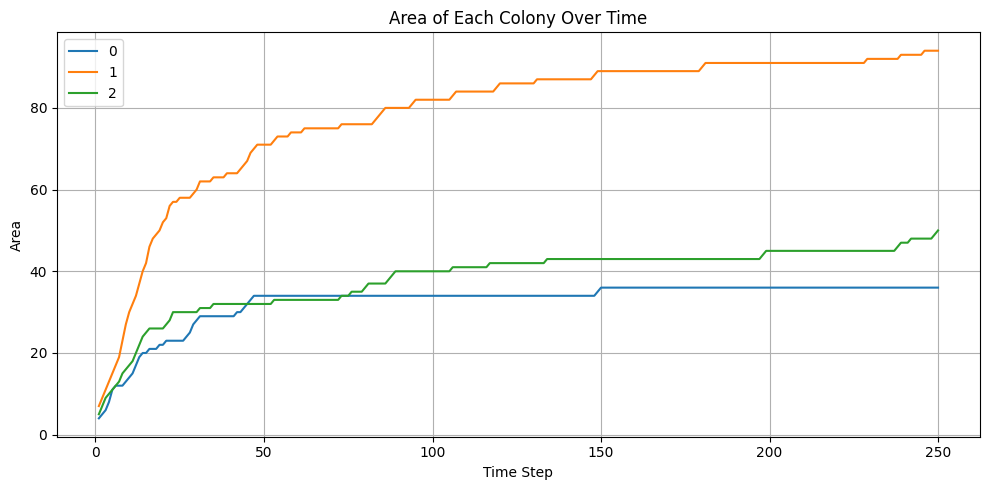

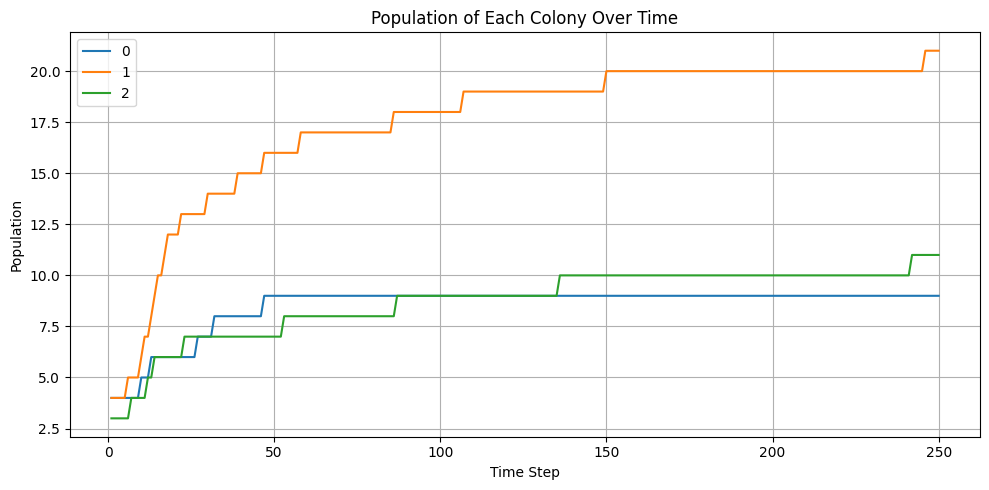

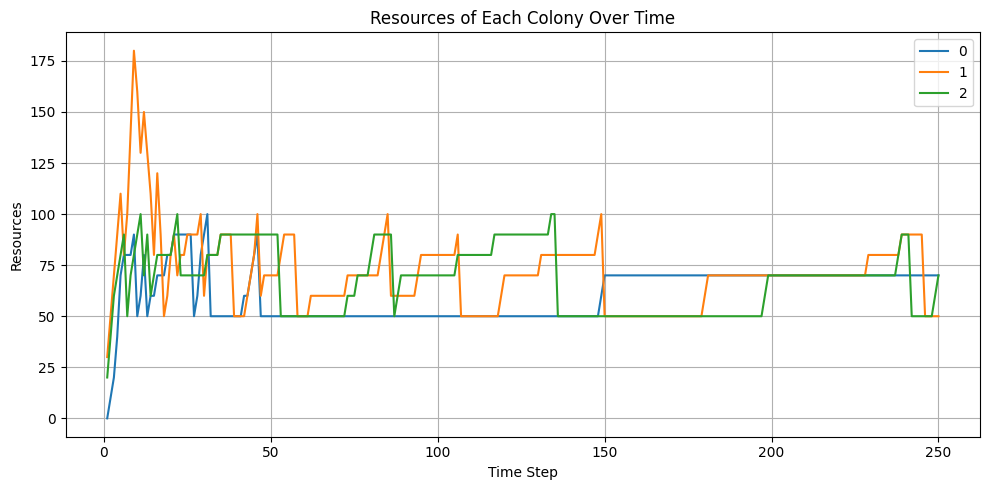

In [1]:
import csv
import matplotlib.pyplot as plt
from collections import defaultdict

# Data structures to store time-series per colony
data = {
    'Area': defaultdict(list),
    'Population': defaultdict(list),
    'Resources': defaultdict(list)
}
times = set()

# Read CSV file
with open('simulation_data_pso.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        time = int(row['Time'])
        colony = row['Colony']
        times.add(time)

        data['Area'][colony].append((time, int(row['Area'])))
        data['Population'][colony].append((time, int(row['Population'])))
        data['Resources'][colony].append((time, int(row['Resources'])))

# Sort times
sorted_times = sorted(times)

# Function to plot one metric
def plot_metric(metric_name, color_map=None):
    plt.figure(figsize=(10, 5))
    for colony, values in data[metric_name].items():
        values.sort()  # Ensure sorted by time
        x = [t for t, _ in values]
        y = [v for _, v in values]
        plt.plot(x, y, label=colony)
    
    plt.title(f'{metric_name} of Each Colony Over Time')
    plt.xlabel('Time Step')
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot all metrics
plot_metric('Area')
plot_metric('Population')
plot_metric('Resources')


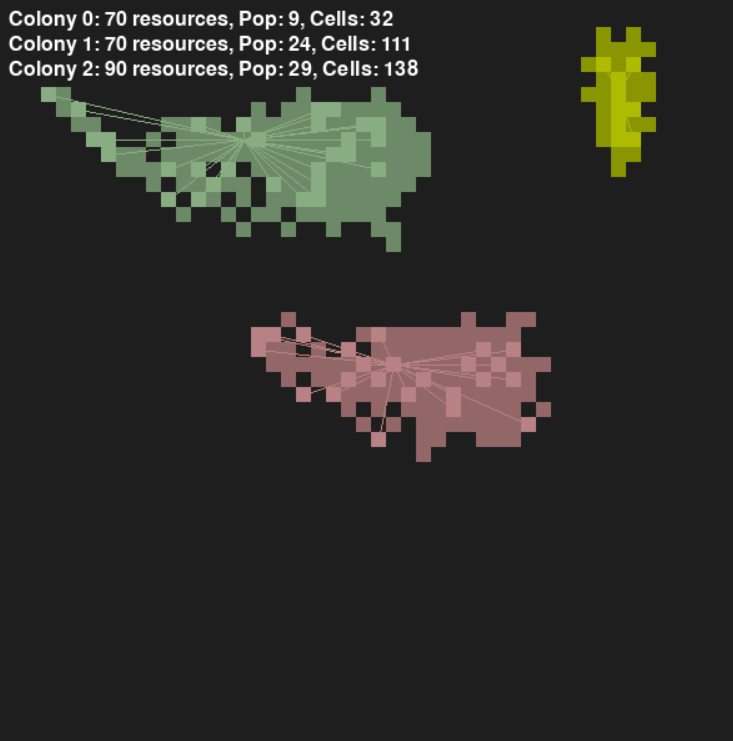

# Greedy Approach

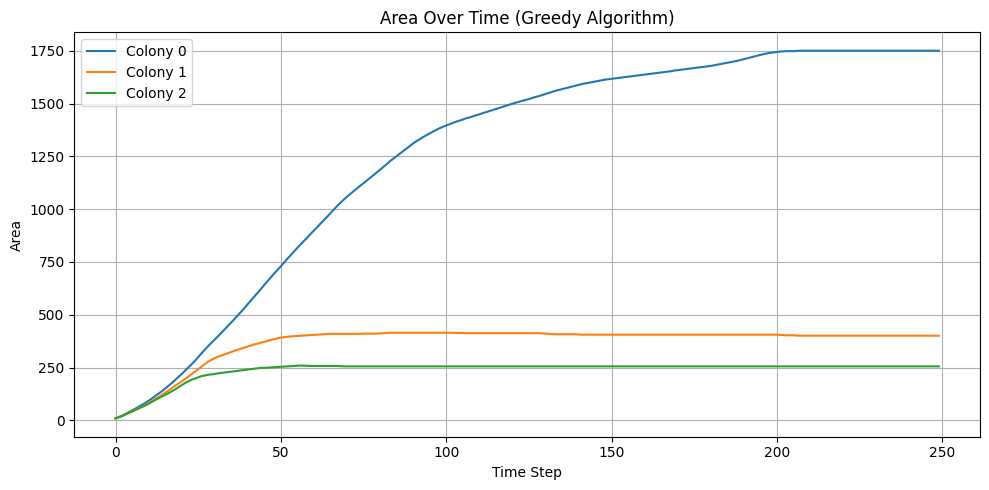

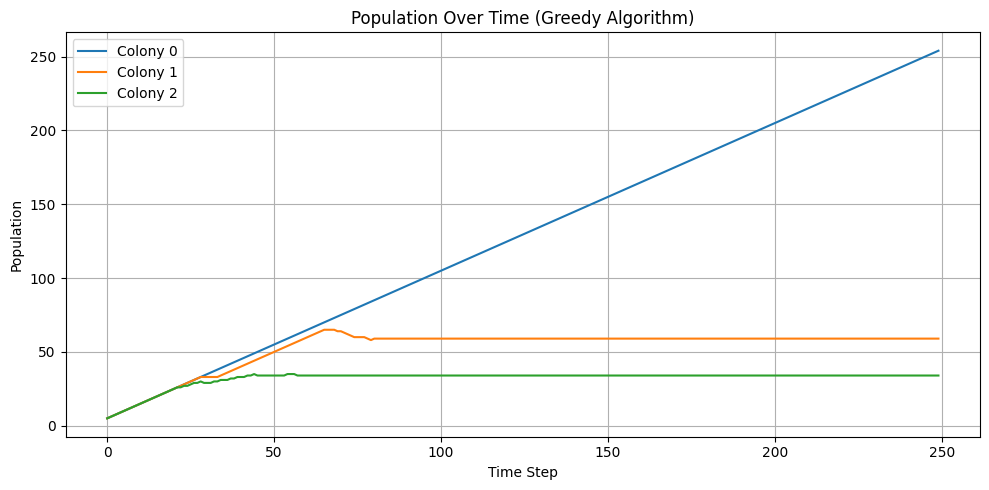

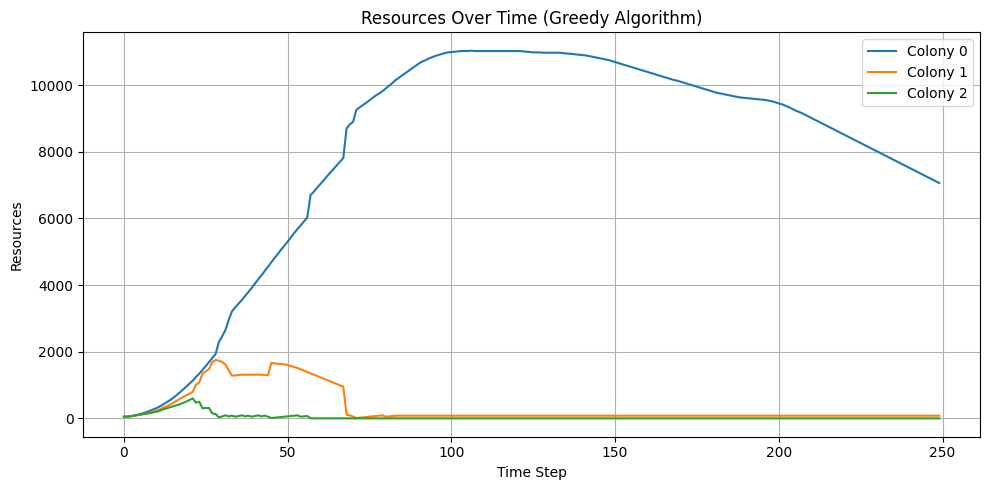

In [2]:
import csv
import matplotlib.pyplot as plt

# Store data
time_steps = []
colonies = [0, 1, 2]
metrics = ['Area', 'Population', 'Resources']

# Initialize storage dict: metrics -> colony -> list of values
data = {metric: {colony: [] for colony in colonies} for metric in metrics}

# Read the CSV
with open('colony_simulation_data_greedy.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        time_steps.append(int(row['Time Step']))
        for colony in colonies:
            data['Area'][colony].append(int(row[f'Colony {colony} Area']))
            data['Population'][colony].append(int(row[f'Colony {colony} Population']))
            data['Resources'][colony].append(int(row[f'Colony {colony} Resources']))

# Function to plot one metric
def plot_metric(metric_name):
    plt.figure(figsize=(10, 5))
    for colony in colonies:
        plt.plot(time_steps, data[metric_name][colony], label=f'Colony {colony}')
    plt.title(f'{metric_name} Over Time (Greedy Algorithm)')
    plt.xlabel('Time Step')
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot all metrics
plot_metric('Area')
plot_metric('Population')
plot_metric('Resources')


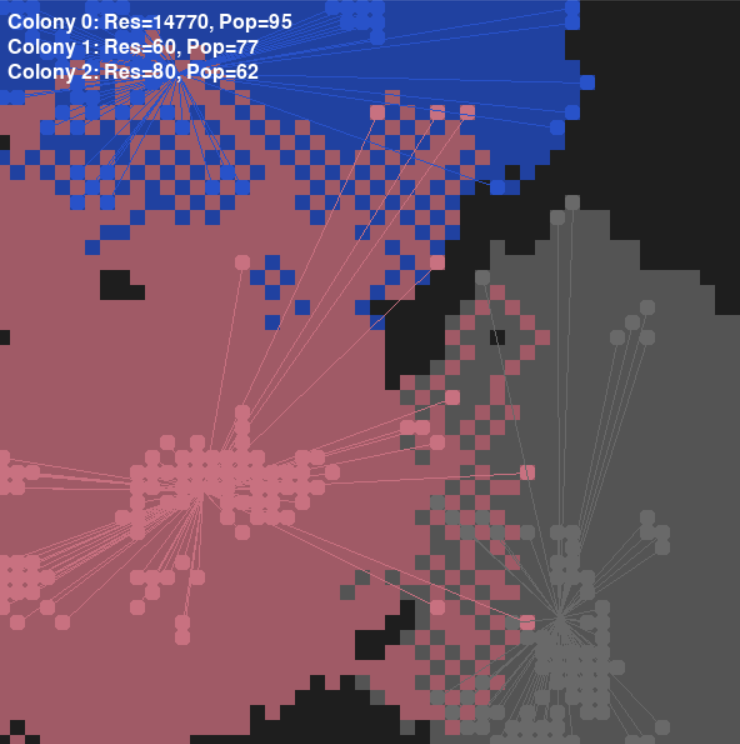

# Comparing All 3 Algo's

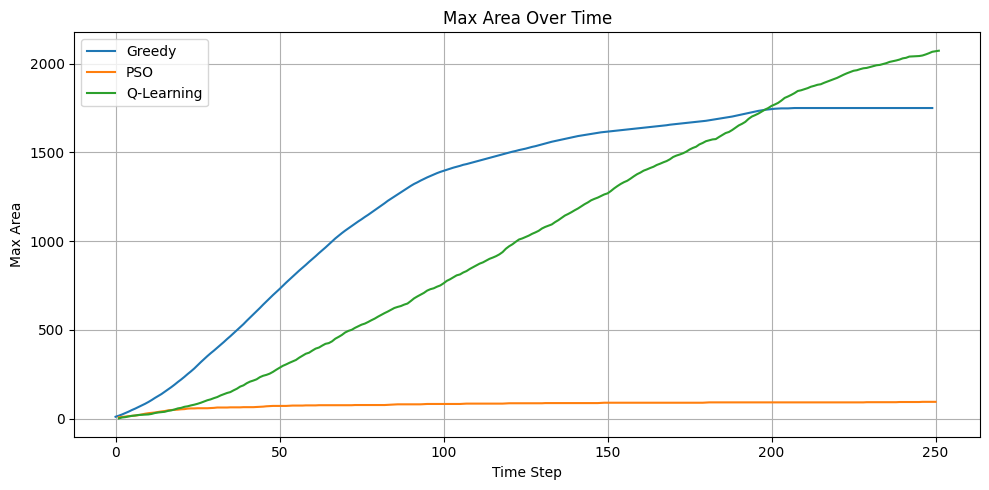

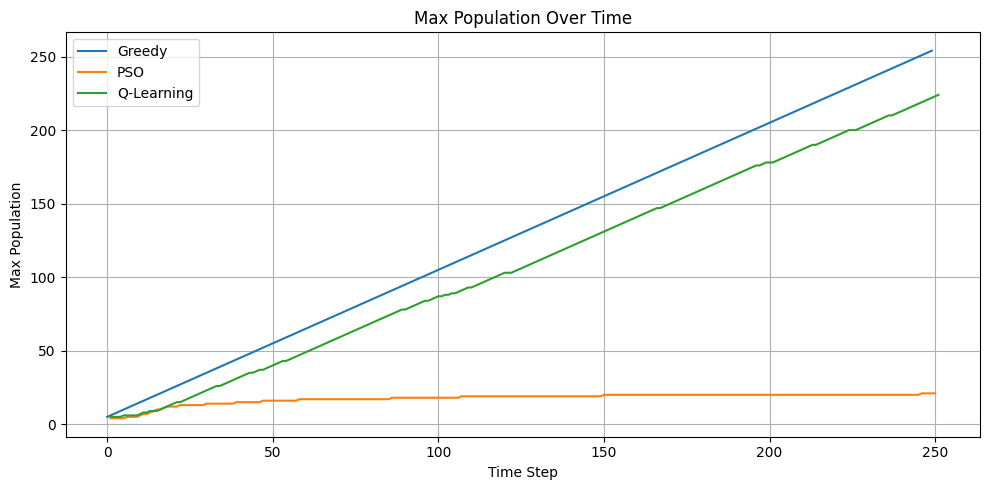

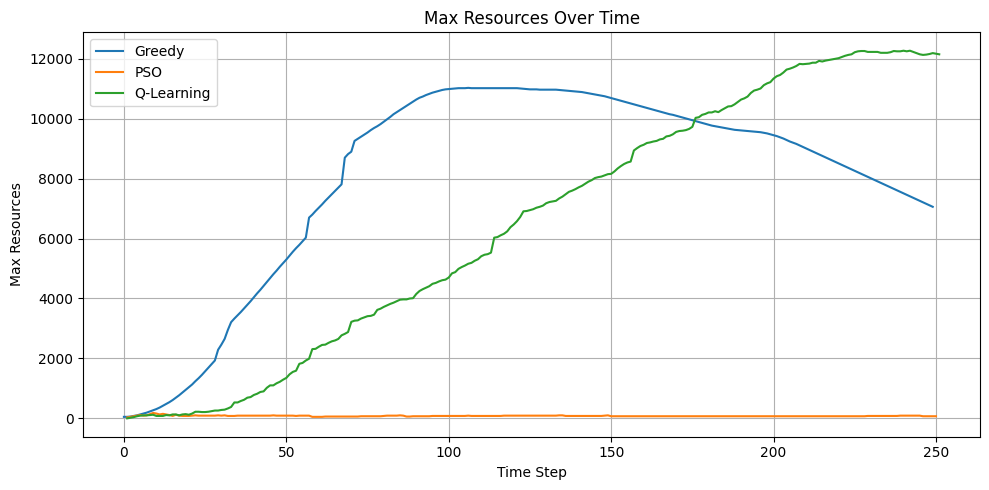

In [4]:
import csv
import matplotlib.pyplot as plt
from collections import defaultdict

metrics = ['Area', 'Population', 'Resources']
algorithms = ['Greedy', 'PSO', 'Q-Learning']

# Store: metric -> algorithm -> list of max values over time
max_metric_data = {metric: defaultdict(list) for metric in metrics}
time_steps = defaultdict(lambda: defaultdict(list))  # metric -> algo -> time list

### --- Load Greedy --- ###
with open('colony_simulation_data_greedy.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        time = int(row['Time Step'])
        for metric in metrics:
            values = [int(row[f'Colony {i} {metric}']) for i in [0, 1, 2]]
            max_metric_data[metric]['Greedy'].append(max(values))
            time_steps[metric]['Greedy'].append(time)

### --- Load PSO --- ###
with open('simulation_data_pso.csv', 'r') as file:
    reader = csv.DictReader(file)
    pso_temp = {metric: defaultdict(list) for metric in metrics}
    for row in reader:
        time = int(row['Time'])
        for metric in metrics:
            pso_temp[metric][time].append(int(row[metric]))
    for metric in metrics:
        for time in sorted(pso_temp[metric].keys()):
            max_val = max(pso_temp[metric][time])
            max_metric_data[metric]['PSO'].append(max_val)
            time_steps[metric]['PSO'].append(time)

### --- Load Q-Learning --- ###
with open('all_colonies_history_q.csv', 'r') as file:
    reader = csv.DictReader(file)

    # Temporary: metric -> step -> list of colony values
    q_stepwise = {metric: defaultdict(list) for metric in metrics}

    # Mapping from your metrics to CSV field names
    metric_to_field = {
        'Area': 'area',
        'Population': 'population',
        'Resources': 'resources'
    }

    for row in reader:
        step = int(row['step'])
        for metric in metrics:
            val = int(row[metric_to_field[metric]])
            q_stepwise[metric][step].append(val)

    for metric in metrics:
        for step in sorted(q_stepwise[metric].keys()):
            max_val = max(q_stepwise[metric][step])
            max_metric_data[metric]['Q-Learning'].append(max_val)
            time_steps[metric]['Q-Learning'].append(step)

### --- Plotting --- ###
for metric in metrics:
    plt.figure(figsize=(10, 5))
    for algo in algorithms:
        plt.plot(time_steps[metric][algo], max_metric_data[metric][algo], label=algo)
    plt.title(f'Max {metric} Over Time')
    plt.xlabel('Time Step')
    plt.ylabel(f'Max {metric}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()